# PRAKTIKUM Natural Language Processing

----------
## **Thema: Part-of-Speech Tagging**

Part-of-Speech Tagging (kurz POS-Tagging) zählt zu den wichtigsten Text-Vorverarbeitungstechniken. Es ist nicht nur die Basis für weitere linguistische Analyseschritte wie das Parsing, sondern wird beispielsweise auch für die Informationsextraktion benötigt oder zur Feature-Selektion für Text Mining-Aufgaben. 

### Lernziele: 
* Weitere Erfahrungen sammeln mit der NLP-Library ``nltk``
* Den Aufbau eines Korpus, das für das Training eines POS-Taggers benötigt wird, erklären können
* Kennen der wichtigsten Tags im Penn Treebank Tagset (wird auch bei spaCy verwendet und es hilft bei der Arbeit, wenn Sie zumindest grob eine Ahnung haben, wie die Tags zu interpretieren sind)
* Einfluss der Korpusgröße untersuchen können und somit auch einschätzen können, welche Relevanz die Korpusgröße auf den Tagging-Prozess hat
* Das Vorgehen des Unigram-Tagger und Bigram-Taggers erklären können und die Unterschiede zwischen beiden Verfahren erklären können

### Lernkontrolle:
* Abgabe der Lösung von Aufgabe 3

-----------
## **Lernmaterial**


* Die Dokumentation von nltk: https://www.nltk.org/api/nltk.html 
* Online-Buch zu nltk: https://www.nltk.org/book/ 
* Informationen zu den verschiedenen Taggern: Vorlesungsunterlagen
* Übungsaufgaben

------------
### Übungsaufgaben 

#### **Vorbereitung**
Falls noch nicht geschehen, machen Sie sich zunächst mit dem grundsätzlichen Aufbau der ``nltk``-Library vertraut: https://www.nltk.org/api/nltk.html


#### **Aufgabe 1: Das Brown Corpus**
Im Folgenden werden wir das Brown Corpus verwenden. Das Brown Corpus (Brown University Standard Corpus of Present-Day American English) ist ein allgemeines Korpus (eine Referenztextsammlung), das ursprünglich von Henry Kučera und W. Nelson Francis in den 1960er Jahren für die linguistische Forschung zusammengestellt wurde. Es besteht aus 500 amerikanisch-englischen Texten mit insgesamt etwa einer Million Wörtern, die alle manuell getaggt wurden und als Ground Truth für POS-Tagging verwendet werden können. Im Vergleich zu heutigen Korpi (z.B. Corpus of Contemporary American English oder International Corpus of English) ist das Brown Corpus sehr klein.


**Teil 1: Bestimmung von Tag-Häufigkeiten** <br>
Bestimmen Sie zunächst die Häufigkeiten der einzelnen Tags im Brown Corpus. Geben Sie anschließend eine Liste, mit den 10 häufigsten Tags der Kategorie "news" aus. <br>
Tipp: Verwenden Sie hierfür die Methoden des ``nltk.corpus`` package https://www.nltk.org/api/nltk.corpus.html

In [1]:
import nltk
nltk.download("brown")
from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\tobia\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
#tokens = (brown.words)

tags = dict()

for word, pos in brown.tagged_words():
    if pos in tags.keys():
        tags[pos] += 1
    else:
        tags[pos] = 1

In [3]:
sorted(tags.items(), key=lambda item: item[1], reverse=True)[0:10]

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476)]

**Teil 2: Bedeutung der Tags** <br>
Schlagen Sie für diese 10 häufigsten Tags nach, für was sie stehen. 

1. NN: noun, common, singular or mass
2. IN: preposition or conjunction, subordinating
3. AT: article
4. JJ: Adjective 
5. . : End of Sentence
6. , : ,
7. NNS: Noun, plural 
8. CC: Coordinating conjunction 
9. RB: Adverb
10: NP: Proper noun, singular 

**Teil 3 (optional):**  
Das Brown-Corpus enthält neben der Kategorie "news" noch weitere Kategorien (siehe im Abschnitt 1.3 hier: https://www.nltk.org/book/ch02.html). Wählen Sie sich einzelne Kategorien aus und überprüfen Sie, ob die Häufigkeiten der Tags relativ betrachtet immer gleich sind bzw. ob Sie dieselben 10 Tags als häufigste Tags bekommen.  
Mögliche Erweiterung: Stellen Sie die unterschiedlichen relativen Häufigkeiten (oder das Ranking) der einzelnen Kategorien in einer Visualisierung dar. 

In [4]:
nltk.download('reuters')
from nltk.corpus import reuters
#tokens = (brown.words)

tags1 = dict()
tags2 = dict()

categorie1 = 'news'
categorie2 = 'religion'

for word, pos in brown.tagged_words():
    if categorie1 and categorie2 in reuters.categories(word):
        if pos in tags1.keys():
            tags1[pos] += 1
        else:
            tags1[pos] = 1
        if pos in tags2.keys():
            tags2[pos] += 1
        else:
            tags2[pos] = 1
    elif categorie1 in reuters.categories(word):
        if pos in tags1.keys():
            tags1[pos] += 1
        else:
            tags1[pos] = 1
    elif categorie2 in reuters.categories(word):
        if pos in tags2.keys():
            tags2[pos] += 1
        else:
            tags2[pos] = 1
        
cat1 = dict(sorted(tags1.items(), key=lambda item: item[1], reverse=True)[0:10])
cat2 = dict(sorted(tags2.items(), key=lambda item: item[1], reverse=True)[0:10])

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\tobia\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [5]:
cat1

{}

<BarContainer object of 0 artists>

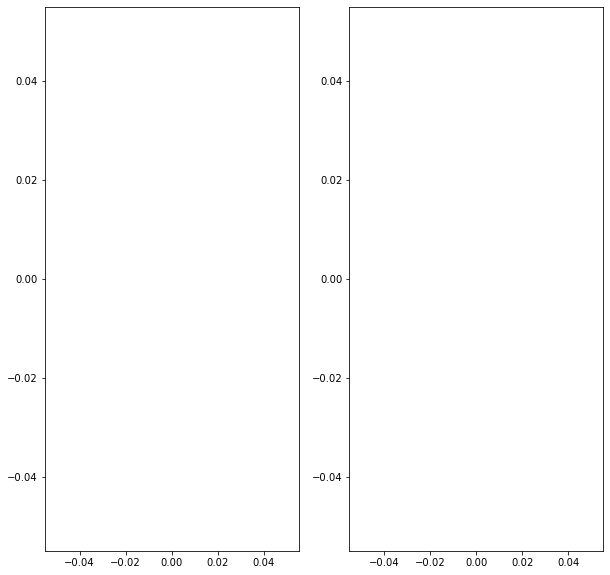

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10, 10))

ax[0].bar(cat1.keys(), cat1.values())

ax[1].bar(cat2.keys(), cat2.values())

#### **Aufgabe 2: Training und Vergleich verschiedener POS-Tagger**

**Teil 1: Training verschiedener Tagger** <br> 

Trainieren Sie nun auf den ersten 20.000 Sätzen des Brown-Corpus
1. einen Unigram Tagger
2. einen Bigram Tagger
3. einen Brill Tagger (verwenden Sie hierfür bitte brill24)

Je nach Rechenkapazität wird das Training einige Minuten dauern. 

Validieren Sie anschließend die Performanz der verschiedenen Tagger mit Hilfe der übrigen Sätze im Brown Corpus. 

Tipp: Informationen zu den Taggern finden Sie in der Dokumentation des Packages ``nltk.tagger``.
https://www.nltk.org/api/nltk.tag.html

### Prepare data

In [20]:
data = brown.tagged_sents()[:] #brown.tagged_words()
# splitting data
split = 0.3
split_index = int( len(data)*split )

train = data[split_index:]
test = data[:split_index]

### Train Tagger

In [21]:
# Templates
templates = nltk.tag.brill.brill24()

In [22]:
# train tagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import brill, brill_trainer
from nltk.tag.brill_trainer import BrillTaggerTrainer

tagger_unigram = UnigramTagger(train)
tagger_bigram = BigramTagger(train)
#tagger_brill = brill_trainer.BrillTaggerTrainer(train, templates)

tagger_brill = UnigramTagger(train)

tagger_brill = BrillTaggerTrainer(tagger_brill, templates)
tagger_brill = tagger_brill.train(train)    # , max_rules=max_rules, min_score=min_score, min_acc=min_acc

### Evaluate Tagger

In [23]:
accuracy_unigram = tagger_unigram.evaluate(test)
accuracy_bigram = tagger_bigram.evaluate(test)
accuracy_brill = tagger_brill.evaluate(test)

print(f"Accuracie:\n\nUnigramm Tagger = {accuracy_unigram}\nBigramm Tagger = {accuracy_bigram}\nBrill Tagger = {accuracy_brill}")

C:\Users\tobia\AppData\Local\Temp\ipykernel_10420\1757672553.py:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy_unigram = tagger_unigram.evaluate(test)
C:\Users\tobia\AppData\Local\Temp\ipykernel_10420\1757672553.py:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy_bigram = tagger_bigram.evaluate(test)
C:\Users\tobia\AppData\Local\Temp\ipykernel_10420\1757672553.py:3: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy_brill = tagger_brill.evaluate(test)


Accuracie:

Unigramm Tagger = 0.86050124698475
Bigramm Tagger = 0.21198468184853564
Brill Tagger = 0.8896084604167518


#### **Teil 2: Auswertung der Ergebnisse**
Welcher Tagger hat am besten abgeschnitten, welcher am schlechtesten? Entsprechen die Höhe der beobachteten Genauigkeit sowie die Unterschiede in Bezug auf die Genauigkeit Ihren Erwartungen? Wieso / wieso nicht? 

- Unigram: Hat sehr gut funktioniert. Der Text scheint die Wörter gleich zu verwenden -> Ein bestimmtes Verb ist meistens in jedem Vorkommen ein Verb 
- Bigram: Hat eine erstaunlich geringe Accuracy. Daraus lässt sich schließen, dass der Kontext in den Sätzen sehr stark unterscheiden und irreführend für das Taggen sind.
- Brill: Die erlernten Regeln scheinen für diesem Kontext gut zu passen.

#### **Aufgabe 3: Einfluss der Korpus-Größe auf das Ergebnis**

**Teil 1: Implementierung des Experiments** <span style="color:red">(Abgabe, 10 Punkte)</span> <br>
Erweitern Sie den Code aus Aufgabe 2 Teil 1 so, dass die Größe des verwendeten Trainings-Korpus variiert werden kann. Ihr Test-Korpus sollte 10.000 Sätze enthalten, den Rest des Korpus können Sie für das Training verwenden. Beginnen Sie mit einem Trainings-Korpus, das 5000 Sätze enthält. Erhöhen Sie die Größe des Trainings-Korpus anschließend schrittweise um jeweils 5000 Sätze. Evaluieren Sie die Tagger in jedem Durchlauf mit Hilfe Ihrer Testdaten. Merken Sie sich jeweils die mit den 3 Taggern erzielte Genauigkeit, so dass Sie die beobachteten Entwicklungen anschließend in einem Liniendiagramm darstellen können. 

Wichtig: Verwenden Sie immer dasselbe Test-Korpus!! (sowohl die Größe des Test-Korpus als auch dessen Inhalt dürfen sich während des Experiments nicht ändern, da sonst die Vergleichbarkeit nicht gewährleistet ist)

Tipp: Die Berechnung hat eine relativ lange Laufzeit (da mehrfach trainiert wird, teils auch auf größeren Korpi). Implementieren und testen Sie Ihre Lösung daher zunächst nur mit einer kleinen Menge von Trainingsdaten. Anschließend können Sie die Berechnung mit dem kompletten Datensatz im Hintergrund laufen lassen, während Sie mit Aufgabe 4 weitermachen. 

In [24]:
len(data)

57340

In [44]:
size_inc = 10    # how often to increase the data-size
inc = 1000
res = list() #[['Name', [x, y, z]], nextExperiment]
index = 1000
size = index

for i  in range(size_inc):
    # Data Preparing
    #data = brown.tagged_sents()[:] #brown.tagged_words()
    # splitting data
    index += inc
    size = index
    test_size = 10000
    index += test_size
    
    # increase inc
    inc *= 1.5
    inc = int(inc)

    # make sure it works
    if index > len(data):
        index = len(data)

    train = data[test_size:index]
    test = data[:test_size]

    # Train
    templates = nltk.tag.brill.brill24()
    
    tagger_unigram = UnigramTagger(train)
    tagger_bigram = BigramTagger(train)
    
        # brill tagger
    tagger_brill = UnigramTagger(train)
    tagger_brill = BrillTaggerTrainer(tagger_brill, templates)
    tagger_brill = tagger_brill.train(train)
    
    # Evaluate
    accuracy_unigram = tagger_unigram.evaluate(test)
    accuracy_bigram = tagger_bigram.evaluate(test)
    accuracy_brill = tagger_brill.evaluate(test)
    
    res += [size, accuracy_unigram, accuracy_bigram, accuracy_brill]
    
print(res)

C:\Users\tobia\AppData\Local\Temp\ipykernel_10420\3038490766.py:39: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy_unigram = tagger_unigram.evaluate(test)
C:\Users\tobia\AppData\Local\Temp\ipykernel_10420\3038490766.py:40: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy_bigram = tagger_bigram.evaluate(test)
C:\Users\tobia\AppData\Local\Temp\ipykernel_10420\3038490766.py:41: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy_brill = tagger_brill.evaluate(test)


[2000, 0.7234654411430131, 0.07308094826409428, 0.7409246029940392, 13500, 0.8346771624880557, 0.14660326705191792, 0.8634663511853301, 25750, 0.8540883651089776, 0.184597533785321, 0.8828002002093097, 39125, 0.8608636301588024, 0.20387223005869773, 0.8901760931883332, 54187, 0.8633207444146153, 0.2169677389998635, 0.8932747872776085, 64933, 0.8633207444146153, 0.2169677389998635, 0.8932110843154206, 68729, 0.8633207444146153, 0.2169677389998635, 0.8932656868544387, 74423, 0.8633207444146153, 0.2169677389998635, 0.8932156345270055, 82964, 0.8633207444146153, 0.2169677389998635, 0.8932156345270055, 95776, 0.8633207444146153, 0.2169677389998635, 0.8932247349501752]


In [56]:
res_t = [res[i:i+4] for i in range(0, len(res), 4)]
res_t

[[2000, 0.7234654411430131, 0.07308094826409428, 0.7409246029940392],
 [13500, 0.8346771624880557, 0.14660326705191792, 0.8634663511853301],
 [25750, 0.8540883651089776, 0.184597533785321, 0.8828002002093097],
 [39125, 0.8608636301588024, 0.20387223005869773, 0.8901760931883332],
 [54187, 0.8633207444146153, 0.2169677389998635, 0.8932747872776085],
 [64933, 0.8633207444146153, 0.2169677389998635, 0.8932110843154206],
 [68729, 0.8633207444146153, 0.2169677389998635, 0.8932656868544387],
 [74423, 0.8633207444146153, 0.2169677389998635, 0.8932156345270055],
 [82964, 0.8633207444146153, 0.2169677389998635, 0.8932156345270055],
 [95776, 0.8633207444146153, 0.2169677389998635, 0.8932247349501752]]

In [51]:
def get_mean(values):
    # mean
    sum_ = sum(values)
    num_ = len(values)
    return sum_ / num_

In [52]:
def get_std(values):
    mean = get_mean(values)
    sum_ = sum(values)
    
    # std
    sum_std = 0
    for value in values:
        sum_std += (value-mean)**2
    return sum_std / len(values)

In [62]:
counter = 0

v_unigram = []
v_bigram = []
v_brill = []
size = []

for ent in res_t:
    counter += 1
    
    size += [ent[0]]
    v_unigram += [ent[1]]
    v_bigram += [ent[2]]
    v_brill += [ent[3]]
    
    print(f"\n----------\nDatasize: {ent[0]}\nUnigram={round(ent[1], 2)}, Bigram={round(ent[2], 2)}, Brill={round(ent[3], 2)}")



----------
Datasize: 2000
Unigram=0.72, Bigram=0.07, Brill=0.74

----------
Datasize: 13500
Unigram=0.83, Bigram=0.15, Brill=0.86

----------
Datasize: 25750
Unigram=0.85, Bigram=0.18, Brill=0.88

----------
Datasize: 39125
Unigram=0.86, Bigram=0.2, Brill=0.89

----------
Datasize: 54187
Unigram=0.86, Bigram=0.22, Brill=0.89

----------
Datasize: 64933
Unigram=0.86, Bigram=0.22, Brill=0.89

----------
Datasize: 68729
Unigram=0.86, Bigram=0.22, Brill=0.89

----------
Datasize: 74423
Unigram=0.86, Bigram=0.22, Brill=0.89

----------
Datasize: 82964
Unigram=0.86, Bigram=0.22, Brill=0.89

----------
Datasize: 95776
Unigram=0.86, Bigram=0.22, Brill=0.89


In [61]:
print(f"#########\nRESULTS\n#########\n\nUnigram mean: {round(get_mean(v_unigram), 2)}\nUnigram std: {get_std(v_unigram)}")
print(f"\nBigram mean: {round(get_mean(v_bigram), 2)}\nBigram std: {get_std(v_bigram)}")
print(f"\nBrill mean: {round(get_mean(v_brill), 2)}\nBrill std: {get_std(v_brill)}")

#########
RESULTS
#########

Unigram mean: 0.85
Unigram std: 0.0017224449692882868

Bigram mean: 0.19
Bigram std: 0.0020128599194951073

Brill mean: 0.87
Brill std: 0.0020377909904771272


**Teil 2: Auswertung des Experiments** <span style="color:red">(Abgabe, 5 Punkte)</span> <br> 
Werten Sie das Experiment aus und diskutieren Sie die erzielten Ergebnisse! 

In [75]:
import numpy as np
import matplotlib.pyplot as plt

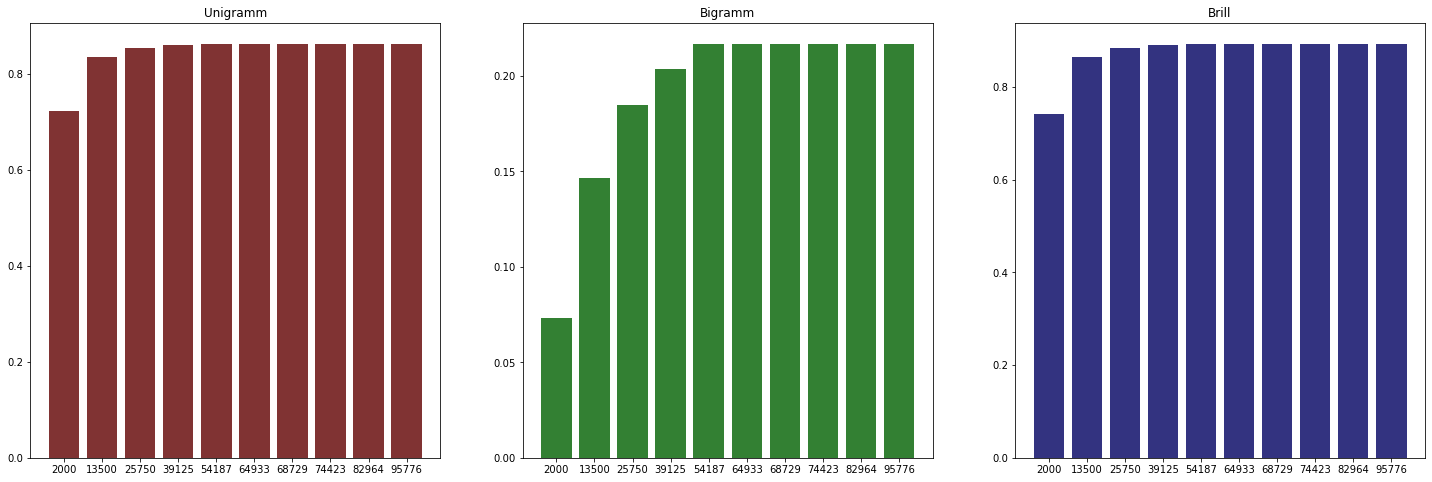

In [111]:
fig, ax = plt.subplots(1, 3, figsize=(25, 8))

labels = size
unigram = v_unigram
bigram = v_bigram
brill = v_brill

ax[0].bar(np.arange(len(unigram)), unigram, color=(0.5,0.2,0.2))
ax[0].set_xticks(np.arange(len(unigram)), labels)
ax[0].set_title("Unigramm")

ax[1].bar(np.arange(len(bigram)), bigram, color=(0.2,0.5,0.2))
ax[1].set_xticks(np.arange(len(bigram)), labels)
ax[1].set_title("Bigramm")

ax[2].bar(np.arange(len(brill)), brill, color=(0.2,0.2,0.5))
ax[2].set_xticks(np.arange(len(brill)), labels)
ax[2].set_title("Brill")

plt.show()

Bei den gut Performenden Taggern, sprich Unigram-Tagger und Brill-Tagger, scheint es eine Grenze zu geben, ab welcher sie sich noch durch die Trainingsdaten verbessern können. Anschließend ist die Verbesserung durch neue Trainingsdaten nur noch geringfügig. Außerdem ist liegt diese Grenze zwischen 2000 und 13500.<br>
<br>
Bei dem Bigramm-Tagger ist dies anders. Dieser hat ebenfalls so eine Grenze, diese liegt aber zwischen 25750-54187 und die Obergrenze, bei welcher sich der Algorithmus nicht mehr verbessert liegt eben nur bei ca. 21%.<br>
Dass die Grenze bei dem Bigramm-Tagger weiter in die Höhe verschoben ist, entspricht der Erwartung. Der Tagger verwendet mehr Informationen und dadurch sind die Fälle seltener, was in mehr benötigten Trainingsdaten resultiert.

#### **Aufgabe 4: Unigram und Bigramm-Tagger (manuell)**

**Trainingsdaten**:

His [PRP] raise [NN] was [VB] five [CD] dollars [NN] . [SYM]
We [PRP] usually [RB] get [VB] a [DT] raise [NN] at [IN] the [DT] start [NN] of [IN] the [DT] year [NN] . [SYM]
A [DT] major [JJ] success [NN] helped [VB] to [TO] raise [VB] our [PRP] spirits [NN] . [SYM]


**Teil 1: Unigram Tagger**  
Gegeben sei der oben dargestellte (sehr kleine) Trainings-Korpus. Bestimmen Sie mit der Methode des Unigram Taggers, ob es wahrscheinlicher ist, dass das Wort "raise" als NN oder als VB getaggt wird. Stellen Sie dabei Ihren Rechenweg dar.

P(raise and NN) = 2/3
P(NN) = 7/11
-
=> 2/3 * 7/11 = 14/33
-

P(raise and VB) = 1/3
P(VB) = 4/11
-
=> 1/3 * 4/11 = 4/33
-

**Teil 2: Bigram Tagger** 
Gegeben sei der oben dargestellte (sehr kleine) Trainings-Korpus. Bestimmen Sie mit der Methode des Bigram Taggers das wahrscheinlichste Tag für das Wort "raise" im folgenden Satz: 

It [PRP] looks [VB] like [CC] a [DT] fine [JJ] place [NN] to [TO] raise [NN or VB?] children [NN] . [SYM]


---
(*Hier war ich etwas unsicher, ob das so funktioniert*)

Ich prüfe, ob NN oder VB wahrscheinlicher nach TO kommt, da das ja der Worttyp vor raise ist.

P(TO and VB) = 1/1
P(VB) = P(TO and VB) * P(raise and VB) = 1/1 * 4/33 = 4/33

P(TO and NN) = 1/1
P(NN) = P(TO and NN) * P(raise and NN) = 0/1 * 14/33 = 0

-> nach Bigram ist es ein Verb

---

#### **Aufgabe 5: Lust auf mehr? (optional)**

Es sind noch viele Erweiterungen denkbar. Sind Sie bei der Bearbeitung der Übungen über etwas gestolpert, dem Sie gerne nachgehen möchten bzw. das Sie vertiefen möchten? 

Beispielsweise könnten Sie noch einen Vergleich mit weiteren in nltk verfügbaren Taggern durchführen. Erzielen Sie dann bessere Ergebnisse? Oder ist der Korpus einfach zu klein? Auch ein Vergleich mit spaCy's Tagger ist denkbar!